### De imports

In [1]:
import multiprocessing
import matplotlib.pyplot as plt
import timeit
import numpy as np
import sys

### merge_sort
In deze functie word de ingevoerde lijst van getallen in twee gesplitst en daarna wordt de merge_lists functie op die twee halve lijsten aangeroepen. Meer over de merge_lists functie hieronder.

In [2]:
def merge_sort(lijst):
    if len(lijst) <= 1:
        return lijst
    else: 
        midden = int(len(lijst)/2)
        links = merge_sort(lijst[:midden])
        rechts = merge_sort(lijst[midden:])
        
    return merge_lists(links, rechts)

### merge_lists
Hier worden de lijsten gesorteerd, ...

In [3]:
def merge_lists(links,rechts):
    l = 0 # teller voor linker helft, daarom l gekozen
    r = 0 # teller voor rechts
    resultaat = []
    while l < len(links) and r < len(rechts):
        if links[l] <= rechts[r]:
            resultaat.append(links[l])
            l += 1
        else:
            resultaat.append(rechts[r])
            r += 1
    while l < len(links):
        resultaat.append(links[l])
        l += 1
        #print(resultaat) # als je het stap voor stap wilt zien haal de '#' weg.
    while r < len(rechts):
        resultaat.append(rechts[r])
        r += 1
        #print(resultaat)
    resultaat += links[l:]
    resultaat += rechts[r:]
    return resultaat

### De output
Hier wordt de merge_sort functie aangeroepen met als parameter de lijst van getallen, ook wordt hier de output weergegeven.

In [4]:
lijst = [24, 8, 15, 3, 38, 12, 11, 7]
print(merge_sort(lijst))

[3, 7, 8, 11, 12, 15, 24, 38]


### Test
Hier test ik of het merge sort algoritme het goed gesorteerd heeft, dat doe ik door het te vergelijken met de ingebouwde sorteer functie van Python.

In [5]:
sorted(lijst) == merge_sort(lijst)

True

# Grote lijsten
Hier gaan we het algoritme testen op grotere lijsten van duizend, tien duizend, dertig duizend en één miljoen.

In [6]:
duizend = np.random.randint(1, 1000000, size=1001)
tien_duizend = np.random.randint(1, 1000000, size=10001)
dertig_duizend = np.random.randint(1, 1000000, size=100001)
miljoen = np.random.randint(1, 1000000, size=1000001)
duizend = duizend.tolist()
tien_duizend = tien_duizend.tolist()
dertig_duizend = dertig_duizend.tolist()
miljoen = miljoen.tolist()

### Threads
Hier worden de functies van hierboven uitgevoerd door verschillende hoeveelheden threads, met als doel om te zien of er veel verschil in de run time zit

In [7]:
def thread_test(functie):

    threads = [1,2,4,8]

    for thread_count in threads:
        pool = multiprocessing.Pool(thread_count)
        print(pool)

        results = [pool.apply_async(functie)]
        print(results)
        %timeit functie

In [8]:
thread_test(merge_sort(lijst))

<multiprocessing.pool.Pool state=RUN pool_size=1>
19.8 ns ± 0.206 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
19.6 ns ± 0.359 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
20.2 ns ± 0.848 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
19.7 ns ± 0.33 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
thread_test(merge_sort(duizend))

<multiprocessing.pool.Pool state=RUN pool_size=1>
20.1 ns ± 0.493 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
19.8 ns ± 0.607 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
20.4 ns ± 0.801 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
19.9 ns ± 0.804 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [10]:
thread_test(merge_sort(tien_duizend))

<multiprocessing.pool.Pool state=RUN pool_size=1>
20.1 ns ± 0.98 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
20.2 ns ± 0.832 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
19.5 ns ± 0.723 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
19.2 ns ± 0.488 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [11]:
thread_test(merge_sort(dertig_duizend))

<multiprocessing.pool.Pool state=RUN pool_size=1>
20.1 ns ± 0.683 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
19.9 ns ± 0.438 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
19.3 ns ± 0.567 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
20.2 ns ± 0.672 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [12]:
thread_test(merge_sort(miljoen))

<multiprocessing.pool.Pool state=RUN pool_size=1>
20 ns ± 0.46 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
19.8 ns ± 0.371 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
20.3 ns ± 0.689 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
19.3 ns ± 0.547 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Grafiek
hier is een grafiek gemaakt met als invoer de tijden van de test hierboven, ik heb getallen ingevuld die ik als uitslag krijg toen in het runde, deze getallen verschillen elke keer, daarom is deze grafiek niet altijd correct. De data die in de grafiek weergegeven is zijn de resulaten van de tests hierboven.

In [27]:
def plot_maken(tijden, tijden2, tijden3, tijden4, tijden5):

    plt.plot([1,2,4,8], tijden)
    plt.plot([1,2,4,8], tijden2)
    plt.plot([1,2,4,8], tijden3)
    plt.plot([1,2,4,8], tijden4)
    plt.plot([1,2,4,8], tijden5)
    plt.ylabel('Nanoseconde')
    plt.xlabel('Threads')
    plt.title('tijdsduur met verschillende hoeveelheden threads')
    plt.legend(['8', '1000', '10000', '30000', '1000000'], loc='upper right')

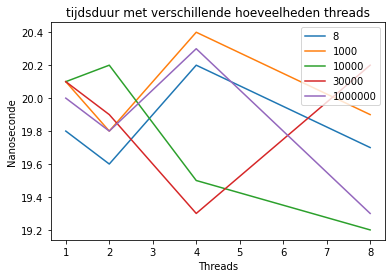

In [28]:
plot_maken([19.8, 19.6, 20.2, 19.7], [20.1, 19.8, 20.4, 19.9], [20.1, 20.2, 19.5, 19.2], [20.1, 19.9, 19.3, 20.2], [20, 19.8, 20.3, 19.3])

### Hoeveel ruimte neemt het in?
Hier gaan we kijken hoeveel ruimte de functie inneemt met verschillende lengte lijsten. We kijken naar het aantal Bytes dat het geheugen gebruikt.

In [29]:
sys.getsizeof(merge_sort(duizend))

9016

In [30]:
sys.getsizeof(merge_sort(tien_duizend))

87616

In [31]:
sys.getsizeof(merge_sort(dertig_duizend))

824456

In [32]:
sys.getsizeof(merge_sort(miljoen))

8697456

#### Ontwerpen
Hier zijn mijn ontwerpen die ik gemaakt heb, hier is te zien hoe ik de werkload zou verdelen over de verschillende threads.
Elke hokje is één thread, als er iets niet in een hokje staad betekend dat dat gedaan wordt door de eerste thread.
De complexiteit van het merge sort algoritme is: O(nlogn)

bron van de complexiteit: https://softwareengineering.stackexchange.com/questions/297160/why-is-mergesort-olog-n#:~:text=The%20complexity%20of%20merge%20sort,and%20NOT%20O(logn).&text=The%20divide%20step%20computes%20the,for%20even%20n)%20elements%20each.
Er is geen bron voor de ontwerpen: ik heb het zelf bedacht

![merge](ontwerpen/merge.png)

Bij één thread kan er niks verdeeld worden, daarom zijn hier geen vakjes getekend en wordt alles door één thread gedaan

![merge2](ontwerpen/merge2.png)

Bij twee threads kan je de werkload eerlijk verdelen over de twee threads, maar de eerste thread moet wel wachten op de tweede thread daarom zal hier amper/geen tijd gewonnen worden.
Aantal threads: 2 
Size per thread: n/2 (n = aantal getallen in rij)

![merge4](ontwerpen/merge4.png)

Aantal threads: 4 
Size per thread: n/4 (n = aantal getallen in rij)

![merge8](ontwerpen/merge8.png)

Aantal threads: 8 
Size per thread: n/8 (n = aantal getallen in rij)

### Conclusie 
Het maakt weinig verschil in hoeveel threads je gebruikt bij deze opdracht, de verschillen zijn zo klein dat het niet te merken is voor de mens. Deze uitkomst vond ik erg apart, ik had namelijk verwacht dat 2 keer de kracht 2 keer zo snel zou gaan, niet dus. Daarom heb ik wat onderzoek gaan doen en ben ik deze video tegengekomen: https://www.youtube.com/watch?v=Obt-vMVdM8s.
In deze video wordt in de eerste 10 minuten veel uitgelegd over de GIL, na 10 minuten was ik mijn concentratie al weer kwijt en ging ik maar een website zoeken waar de GIL sneller en of beter wordt uitgelegd. Toen kwam ik op deze site: https://realpython.com/python-gil/. Daar blijkt al snel waarom de GIL is toegevoegd, namelijk voor memory management. Maar met die oplossing kwamen ook een paar nadelen, namelijk dat Python nu niet echt meer geschikt is om parallel taken uit te voeren